# Declaration of Originality

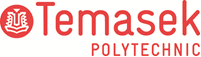

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :   Low Feng Hao, Esmond
* Tutorial Group                :   TC07
* Tutor						    :   Ms Esther Goh
* Submission Date               :   11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [20]:
## Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 1. Business Understanding
#### Context:
**The COVID-19 pandemic has placed an unprecedented strain on health systems, with rapidly increasing demand for healthcare in hospitals and intensive care units (ICUs) worldwide. As the pandemic escalates, determining the resulting needs for healthcare resources (beds, staff, equipment) has become a key priority for many countries. Projecting future demand requires estimates of how long patients with COVID-19 need different levels of hospital care.**
**While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.**
**The problem is to manage the functioning of Hospitals in a professional and optimal manner.**

#### Goal:
**To predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.**

Source: https://www.kaggle.com/datasets/arashnic/covid19-hospital-treatment/data


# 2. Data Understanding

## 2.1 Load dataset

In [21]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'hospital.csv'
df = pd.read_csv(FILE_PATH)
df

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,0,1,0,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,0,4,0,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,1,2,1,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


Based on the data given here and from the business understanding, Stay_Days is the target we are trying to predict, while the rest of the columns are just the features. Additionally, what I can tell is that there are indeed some unnecessary data I can already pinpoint (such as unnecessary ids), which I can remove later

## 2.2 Summary Statistics

In [22]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [23]:
## Check for missing data
df.isna().sum()

case_id                                 0
Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

In [24]:
#Since got missing data for the bed grades and city codes just drop all rows that has missing
df = df.dropna()

In [25]:
df.describe(include="all")
#remove or replace with mode for bed grade
#remove first, then visualize data

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
count,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793,313793,313793,313793.000000,313793.000000,313793.000000,313793,313793,313793.000000,313793,313793.000000,313793
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,NaN,NaN,NaN,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,31-40,NaN,21-30
freq,NaN,NaN,NaN,NaN,NaN,NaN,245850,126104,111006,NaN,NaN,NaN,150252,173425,NaN,62760,NaN,86316
mean,158937.911120,18.326419,1.257781,4.778169,0.780358,3.196419,NaN,NaN,NaN,2.622952,65743.029382,7.252447,NaN,NaN,3.280857,NaN,4881.893165,NaN
std,91939.506976,8.633613,1.535338,3.103237,0.752329,1.167924,NaN,NaN,NaN,0.872618,37978.083237,4.745243,NaN,NaN,1.761758,NaN,1086.243945,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,79271.000000,11.000000,0.000000,2.000000,0.000000,2.000000,NaN,NaN,NaN,2.000000,32833.000000,4.000000,NaN,NaN,2.000000,NaN,4188.000000,NaN
50%,158950.000000,19.000000,1.000000,5.000000,1.000000,3.000000,NaN,NaN,NaN,3.000000,65735.000000,8.000000,NaN,NaN,3.000000,NaN,4742.000000,NaN
75%,238399.000000,26.000000,2.000000,7.000000,1.000000,4.000000,NaN,NaN,NaN,3.000000,98472.000000,8.000000,NaN,NaN,4.000000,NaN,5410.000000,NaN


In [26]:
#Getting the unique values of object columns just to see the values to ensure dataset matches the description from the source
col_categorical = df.select_dtypes(include=['object']).columns

for col in df[col_categorical]:
    print(f'{col} ({df[col].nunique()}): {df[col].unique()}')

Department (5): ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
Ward_Type (6): ['R' 'S' 'Q' 'P' 'T' 'U']
Ward_Facility (6): ['F' 'E' 'D' 'B' 'A' 'C']
Type of Admission (3): ['Emergency' 'Trauma' 'Urgent']
Illness_Severity (3): ['Extreme' 'Moderate' 'Minor']
Age (10): ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']
Stay_Days (11): ['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

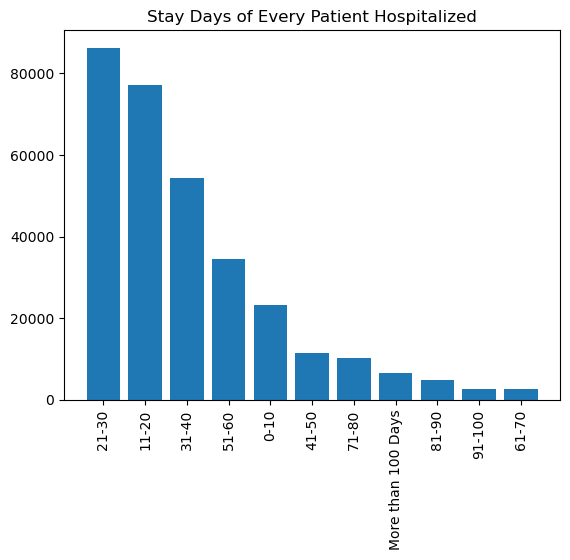

In [38]:
## Understanding distribution of target
target = df['Stay_Days']
get_target = target.value_counts() #get counts of each category of stay days to be displayed in the data
plt.xticks(rotation=90) #rotate labels for readability
plt.bar(get_target.index, get_target.values)
plt.title('Stay Days of Every Patient Hospitalized')
plt.show()

Based on the distribution of the target (number of stay days for each patient) by using a bar graph, we can see that most patients (with more than 80,000 + patients) have stayed for at least 21 to 30 days in a hopsital while there is only a small number of patients who have stayed for 91 to 100 and 61 to 70 days in the hospital.

### 2.3.1.2 Understanding distribution of features

In [28]:
## Understanding distribution of features
# But before that lets remove any unnecessary columns, such as case_id, patientid, Patient_Visitors, Admission_Deposit
features = df.drop(['case_id', 'patientid', 'Patient_Visitors', 'Admission_Deposit'], axis=1)
features

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Age,Stay_Days
0,8,2,3,2,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,51-60,0-10
1,2,2,5,2,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,51-60,41-50
2,10,4,1,0,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,51-60,31-40
3,26,1,2,1,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,51-60,41-50
4,26,1,2,1,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,51-60,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,0,6,0,3,radiotherapy,Q,F,4.0,23.0,Emergency,Moderate,41-50,11-20
318434,24,0,1,0,2,anesthesia,Q,E,4.0,8.0,Urgent,Moderate,81-90,31-40
318435,7,0,4,0,3,gynecology,R,F,4.0,10.0,Emergency,Minor,71-80,11-20
318436,11,1,2,1,3,anesthesia,Q,D,3.0,8.0,Trauma,Minor,11-20,11-20


### 2.3.2 Understanding relationship between variables

In [29]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [30]:
## Clean data

## 3.2 Train-Test Split

In [31]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [32]:
## Initialise and train model


# 5. Model Evaluation

In [33]:
## Evaluate model


In [34]:
## New data

## Predict


## Iterative model development


In [35]:
## Further feature engineering / feature selection